In [5]:
%matplotlib notebook 
from ipywidgets import *
import burnman
from burnman import minerals
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')

## Attempting to match PREM in the lower mantle using Mg, Si and O

** NOTE: please wait until this page loads completely**

With only these three elements, the mineralogy will be dominantly Mg-perovskite ($MgSiO_3$) and periclase ($MgO$).
We will vary the molar fraction of perovskite, and calculate $V_S$ and density along a reasonable geotherm, comparing this with PREM.

<IPython.core.display.Javascript object>


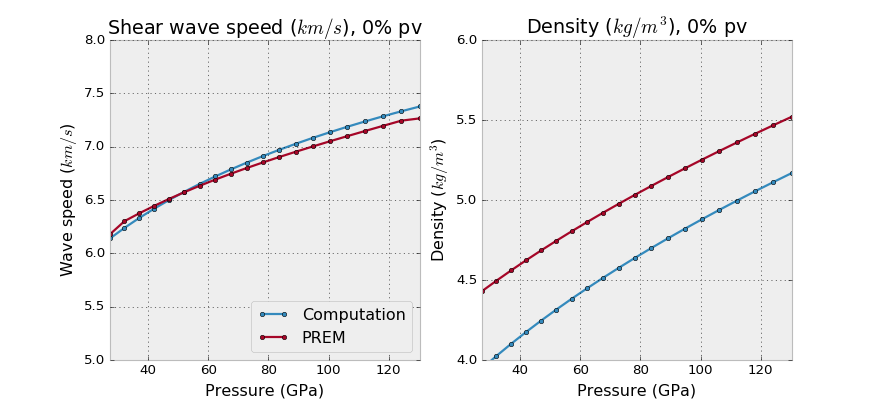

In [6]:
pv = 0.5
rock = burnman.Composite([minerals.SLB_2011.mg_perovskite(),
                          minerals.SLB_2011.periclase()],
                          [pv, 1.0-pv])
depths = np.linspace(750e3, 2800e3, 20)
seismic_model = burnman.seismic.PREM()
pressure, seis_rho, seis_vp, seis_vs, seis_vphi = seismic_model.evaluate(
    ['pressure', 'density', 'v_p', 'v_s', 'v_phi'], depths)
temperature = burnman.geotherm.brown_shankland(pressure)
density, vp, vs, vphi = rock.evaluate(
    ['density', 'v_p', 'v_s', 'v_phi'], pressure, temperature)

fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(121)
vs_line, = ax1.plot(pressure / 1.e9, vs / 1.e3, linestyle='-',
         marker='o', markersize=4, label='Computation')
ax1.plot(pressure / 1.e9, seis_vs / 1.e3, linestyle='-',
         marker='o', markersize=4, label='PREM')
ax1.set_title("Shear wave speed ($km/s$), %d%% pv" % (pv*100.0))
ax1.set_xlim(min(pressure) / 1.e9, max(pressure) / 1.e9)
ax1.set_ylim(5, 8.0)
ax1.set_xlabel("Pressure (GPa)")
ax1.set_ylabel('Wave speed ($km/s$)')
ax1.legend(loc='lower right')

    
ax2 = fig.add_subplot(122)    
rho_line, = ax2.plot(pressure / 1.e9, density / 1.e3,
         linestyle='-', marker='o', markersize=4)
ax2.plot(pressure / 1.e9, seis_rho / 1.e3,
     linestyle='-', marker='o', markersize=4)
ax2.set_xlim(min(pressure) / 1.e9, max(pressure) / 1.e9)
ax2.set_ylim(4.0, 6.0)
ax2.set_xlabel("Pressure (GPa)")
ax2.set_ylabel('Density ($kg/m^3$)')
ax2.set_title("Density ($kg/m^3$), %d%% pv" % (pv*100.0))

plt.show()

In [7]:
@interact(pv=FloatSlider(min=0.0, max=1.0, step=0.1,continuous_update=False))
def update_plot(pv):
    rock = burnman.Composite([minerals.SLB_2011.mg_perovskite(),
                              minerals.SLB_2011.periclase()],
                              [pv, 1.0-pv])
    density, vp, vs, vphi = rock.evaluate(
        ['density', 'v_p', 'v_s', 'v_phi'], pressure, temperature)
    rho_line.set_data([pressure/1.e9,density/1.e3])
    vs_line.set_data([pressure/1.e9,vs/1.e3])
    ax1.set_title("Shear wave speed ($km/s$), %d%% pv" % (pv*100.0))
    ax2.set_title("Density ($kg/m^3$), %d%% pv" % (pv*100.0))

    plt.draw()


In [8]:
%%html
<script>
    // Note:
    // This html code block will
    // 1. do "run-all-cells" 0.5s after the kernel is loaded
    // 2. hide all code blocks (and offer a button to toggle the code)
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                // js widgets are not available immediately. Instead, trigger this a little later:
                console.log("kernel_ready triggered, preparing auto run-all-cells");
                setTimeout(function() {
                            console.log("Auto-running all cells...");
                            jupyter.actions.call('jupyter-notebook:run-all-cells');
                           }, 500);
                //jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
code_show=false; 
function code_toggle() {
    if (code_show){
	$('div.input').hide();
    } else {
	$('div.input').show();
    }
    code_show = !code_show
} 
function init() { $('div.input').hide();}
$( document ).ready(init);
$( document ).load(init);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>
